In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
df = pd.read_csv("./agren_40_long/nc_pre_Tl.csv")
df_unl = df.drop(columns='label')

np.sum(df.drop(columns='label').values, axis=1)

array([1., 1., 1., 1.])

['bone marrow - hematopoietic cells', 'breast - adipocytes', 'breast - myoepithelial cells', 'bronchus - respiratory epithelial cells', 'cerebellum - cells in molecular layer', 'cerebral cortex - neuropil', 'cervix, uterine - glandular cells', 'colon - peripheral nerve-ganglion', 'esophagus - squamous epithelial cells', 'fallopian tube - glandular cells', 'gallbladder - glandular cells', 'heart muscle - myocytes', 'hippocampus - glial cells', 'kidney - cells in glomeruli', 'kidney - cells in tubules', 'lateral ventricle - glial cells', 'lateral ventricle - neuronal cells', 'liver - hepatocytes', 'lung - pneumocytes', 'nasopharynx - respiratory epithelial cells', 'ovary - follicle cells', 'ovary - ovarian stroma cells', 'rectum - glandular cells', 'salivary gland - glandular cells', 'seminal vesicle - glandular cells', 'skin - melanocytes', 'small intestine - glandular cells', 'soft tissue  - adipocytes', 'soft tissue  - fibroblasts', 'spleen - cells in white pulp', 'stomach, lower - gl

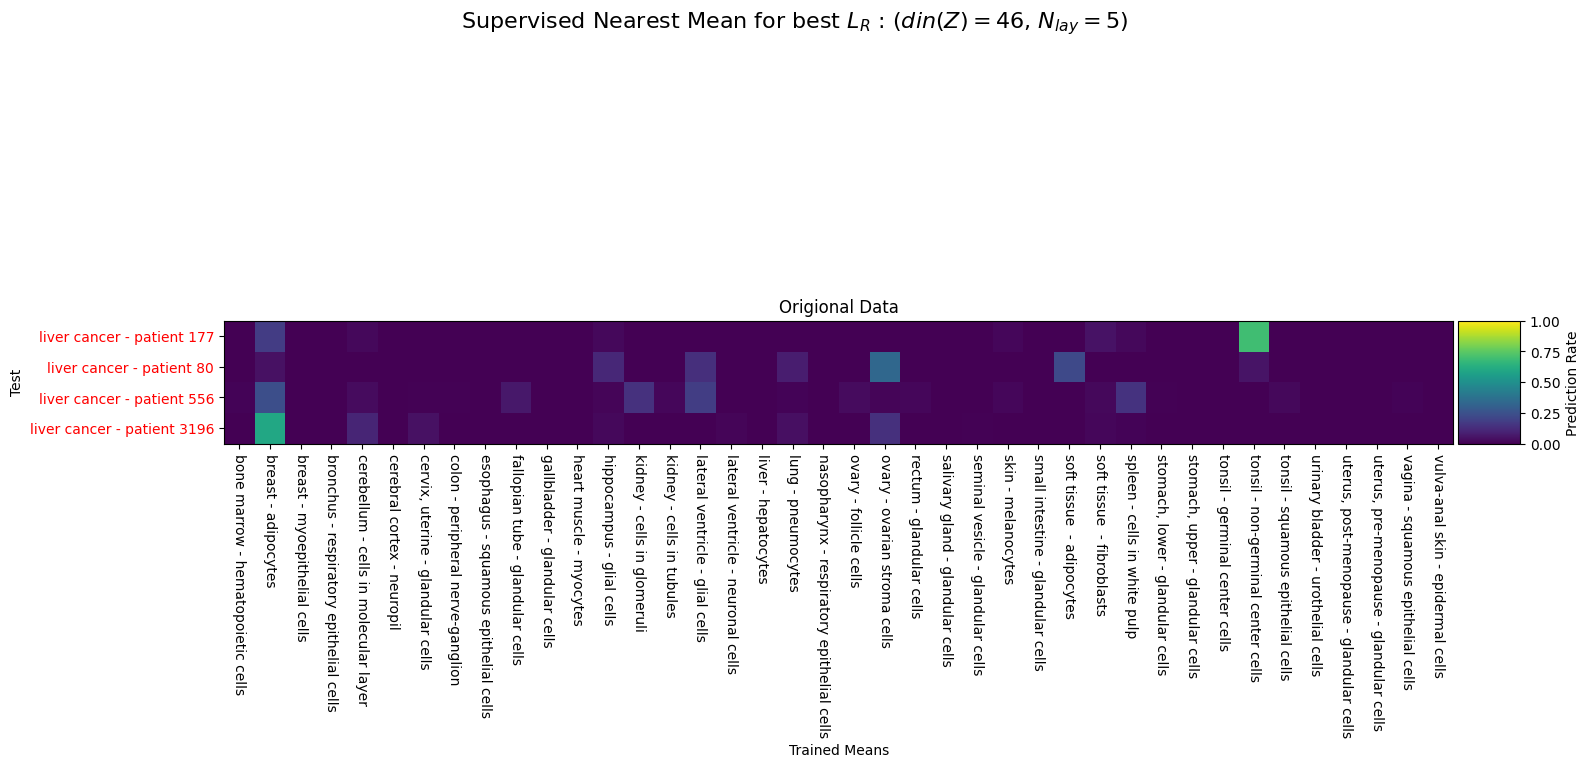

In [6]:
fig, (ax1) = plt.subplots(1,1, figsize=(16,8))

ax1.imshow(df_unl, vmin=0, vmax=1)
im = ax1.imshow(df_unl, vmin=0, vmax=1)

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)     
cbar = plt.colorbar(im, cax=cax, location="right", label="Prediction Rate")

xlocs = range(df_unl.values.shape[1])
ylocs = range(len(df))


yticks = list(map(lambda s: s.replace('_', ' ').replace('2', ''), df['label']))
xticks = list(map(lambda s: s.replace('_', ' ').replace('2', '')[:-1], df_unl.columns))
#xticks = list(map(lambda x: x[:8] + "...",df_unl.columns))


ax1.set_xticks(xlocs, xticks, rotation=270)
ax1.set_yticks(ylocs, yticks)
ax1.set_ylabel("Test")
ax1.set_xlabel("Trained Means")
ax1.set_title("Origional Data")

common_ticks = set.intersection(set(yticks), set(xticks))
print(xticks)
print(yticks)
print(common_ticks)
print(len(common_ticks))

[l.set_color('red') for l, c in zip(ax1.yaxis.get_ticklabels(), yticks) if c not in common_ticks]

#[l.set_color('red') for l in ax1.yaxis.get_ticklines()[40:]]

fig.suptitle("Supervised Nearest Mean for best $L_R$ : ($din(Z)=46$, $N_{lay}=5$)", fontsize=16)
fig.tight_layout()

plt.savefig("./nc2.png", dpi=600)